 ##Data Management Notebook for Open Acess

###Importing libraries:

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


###The number of immigrants currently active and inactive
####employed persons and job-seekers

In [2]:
df_act = pd.read_csv("https://raw.githubusercontent.com/openaccesstoimmigrants/openaccesstoimmigrants/main/_datasets/ISTAT_Active_Foreigners%5B2018-2022%5D.csv", sep=",")

df2 = df_act[["Gender", "Age class", "Highest level of education attained", "TIME", "Value"]]

act_females = df2[df2["Gender"] == 'females']

act_females['TIME'] = act_females['TIME'].astype('str')
mask = (act_females['TIME'].str.len() == 4)
act_females = act_females.loc[mask]

act_females_final = act_females[act_females["Highest level of education attained"] != 'total']

act_females_final.rename(columns = {'Highest level of education attained':'Education', 'TIME':'Year'}, inplace = True)
act_females_final['Year'] = act_females_final['Year'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_6756\3948419923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_females['TIME'] = act_females['TIME'].astype('str')
C:\Users\User\AppData\Local\Temp\ipykernel_6756\3948419923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_females_final.rename(columns = {'Highest level of education attained':'Education', 'TIME':'Year'}, inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_6756\3948419923.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [3]:
act_females_ed_1 = act_females_final[act_females_final["Education"]=='no educational degree, primary and lower secondary school certificate']
act_females_ed_2 = act_females_final[act_females_final["Education"]=='upper and post secondary']
act_females_ed_3 = act_females_final[act_females_final["Education"]== 'tertiary (university, doctoral and specialization courses)']

In [7]:
ed_internal_id = []

def int_id(data):
    for row in data.iterrows():
        ed_internal_id.append("ed-" + str(idx))

act_females_ed_1['internalId'] = pd.Series(ed_internal_id)

act_females_ed_1

C:\Users\User\AppData\Local\Temp\ipykernel_6756\2590256315.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  act_females_ed_1['internalId'] = pd.Series(ed_internal_id)
C:\Users\User\AppData\Local\Temp\ipykernel_6756\2590256315.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_females_ed_1['internalId'] = pd.Series(ed_internal_id)


,Gender,Age class,Education,Year,Value,internalId
225,females,15-64 years,"no educational degree, primary and lower secon...",2018,51.906909,NaN
230,females,15-64 years,"no educational degree, primary and lower secon...",2019,51.645182,NaN
235,females,15-64 years,"no educational degree, primary and lower secon...",2020,44.815162,NaN
240,females,15-64 years,"no educational degree, primary and lower secon...",2021,45.968750,NaN
241,females,15-64 years,"no educational degree, primary and lower secon...",2022,47.164028,NaN


In [22]:
x = [2018, 2019, 2020, 2021, 2022]
from bokeh.plotting import figure, show
p = figure(title="Active rate", x_axis_label='x', y_axis_label='Value')
show(p)

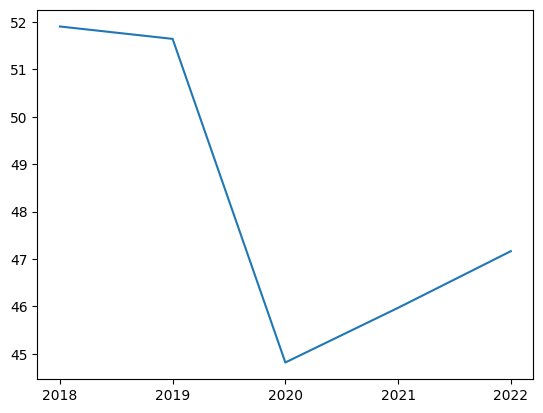

In [7]:
plt.plot(act_females_ed_1["Year"], act_females_ed_1["Value"])
plt.show()

In [5]:
ED2 = act_females_final[act_females_final["Education"] == "upper and post secondary"]
from pathlib import Path  
filepath = Path('openaccesstoimmigrants/ED2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
ED2.to_csv(filepath) 

In [6]:
act_females_18

,Gender,Age class,Education,Year,Value
75,females,15-64 years,upper and post secondary,2018,67.333505
100,females,15-64 years,"tertiary (university, doctoral and specializat...",2018,71.341341
225,females,15-64 years,"no educational degree, primary and lower secon...",2018,51.906909


In [7]:
act_males = df2[df2["Gender"]=='males']

act_males['TIME'] = act_males['TIME'].astype('str')
mask = (act_males['TIME'].str.len() == 4)
act_males = act_males.loc[mask]

act_males_final = act_males[act_males["Highest level of education attained"] != 'total']

act_males_final.rename(columns = {'Highest level of education attained':'Education', 'TIME':'Year'}, inplace = True)

act_males_18 = act_males_final[act_males_final["Year"]=='2018']

act_males_18

C:\Users\User\AppData\Local\Temp\ipykernel_11084\553527974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_males['TIME'] = act_males['TIME'].astype('str')
C:\Users\User\AppData\Local\Temp\ipykernel_11084\553527974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_males_final.rename(columns = {'Highest level of education attained':'Education', 'TIME':'Year'}, inplace = True)


,Gender,Age class,Education,Year,Value
0,males,15-64 years,upper and post secondary,2018,88.153575
25,males,15-64 years,"tertiary (university, doctoral and specializat...",2018,88.981594
250,males,15-64 years,"no educational degree, primary and lower secon...",2018,80.831575


In [9]:
#from pathlib import Path  
#filepath = Path('openaccesstoimmigrants/D1.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#merged.to_csv(filepath)  

In [24]:
df_occ = pd.read_csv("_datasets/ISTAT_Sex_Occupation_region[2018-2022].csv", sep=",")

df_occ

,ITTER107,Territory,SEXISTAT1,Gender,ETA1,Age class,CITTADINANZA,Citizenship,PROFESSIONE1,Occupation 2011,TIME,Select time,Value,Flag Codes,Flags
0,IT,Italy,2,females,Y15-89,15-89 years,FRG,foreign,20,white collar,2018,2018,485.144,NaN,NaN
1,IT,Italy,2,females,Y15-89,15-89 years,FRG,foreign,20,white collar,2018-Q2,Q2-2018,489.322,NaN,NaN
2,IT,Italy,2,females,Y15-89,15-89 years,FRG,foreign,20,white collar,2018-Q1,Q1-2018,469.909,NaN,NaN
3,IT,Italy,2,females,Y15-89,15-89 years,FRG,foreign,20,white collar,2018-Q4,Q4-2018,477.796,NaN,NaN
4,IT,Italy,2,females,Y15-89,15-89 years,FRG,foreign,20,white collar,2018-Q3,Q3-2018,503.550,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,IT,Italy,1,males,Y15-89,15-89 years,FRG,foreign,99,total,2021-Q4,Q4-2021,1398.250,NaN,NaN
252,IT,Italy,1,males,Y15-89,15-89 years,FRG,foreign,99,total,2022-Q1,Q1-2022,1366.794,NaN,NaN
253,IT,Italy,1,males,Y15-89,15-89 years,FRG,foreign,99,total,2022-Q2,Q2-2022,1391.485,NaN,NaN
254,IT,Italy,1,males,Y15-89,15-89 years,FRG,foreign,99,total,2022-Q3,Q3-2022,1404.161,NaN,NaN
